In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [28]:
df=pd.read_csv(r"C:\Users\suhan\Downloads\income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


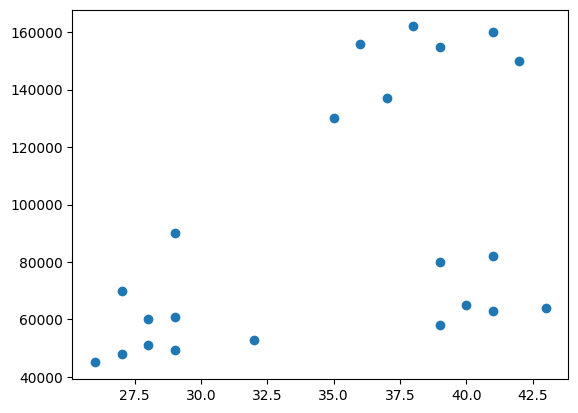

In [7]:
plt.scatter(df['Age'],df['Income($)'])

In [29]:
from sklearn.cluster import KMeans
km =KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [30]:
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [31]:
df['cluster']=y_pred
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


C:\Users\suhan\AppData\Local\Temp\ipykernel_10140\3010348818.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


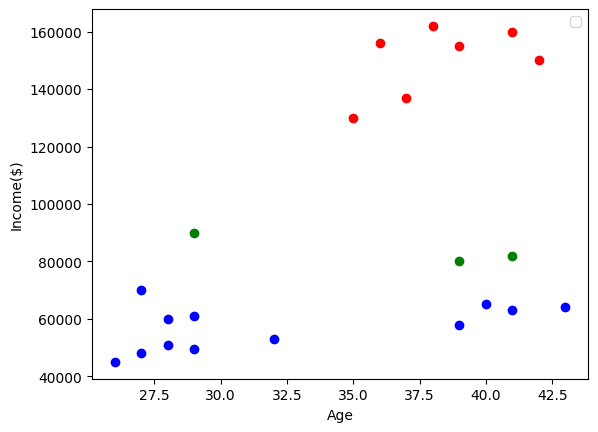

In [32]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green') 
plt.scatter(df2.Age,df2['Income($)'],color='red') 
plt.scatter(df3.Age,df3['Income($)'],color='blue') 
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [41]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

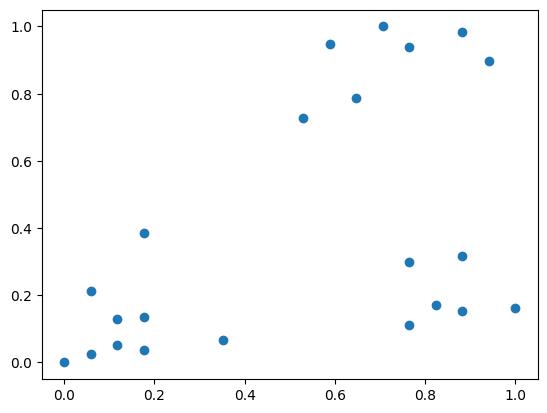

In [42]:
plt.scatter(df.Age,df['Income($)'])

In [43]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [44]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [45]:

km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

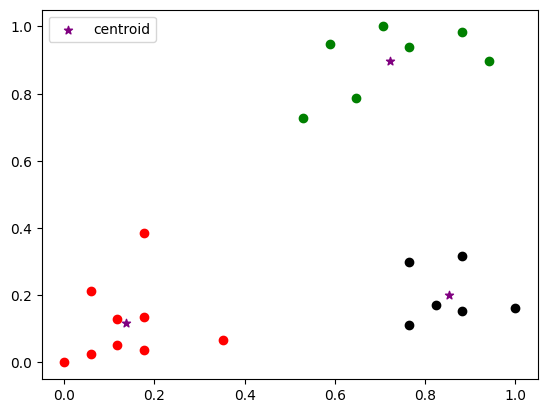

In [46]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [52]:
#elbowplot
k_range=range(1,11)
sse=[] #sum of square err
for k in k_range:
    km= KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3687734076440589,
 0.3667363439555349,
 0.22508595962223266,
 0.19210565758491113,
 0.16208852897404635,
 0.11793228590762085,
 0.09317944374468488]

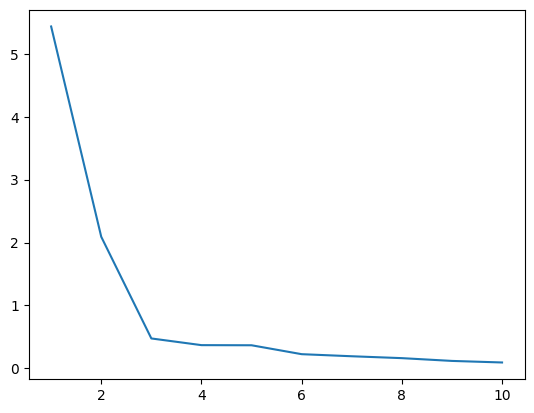

In [53]:
plt.plot(k_range,sse)